#Lab 6
## Modification to plot a square in the complex palne with center in (z_c_r, z_c_i) and of size zw x zh 

Modfied from Fractals with Python - The Newton Set https://blog.anvetsu.com/posts/fractals-newton-python-matplotlib-numpy/
from the Fractals with Python series https://blog.anvetsu.com/tags/fractal/

![picture](https://raw.githubusercontent.com/gjhernandezp/algorithms/master/Z3_1centermap.png)

##$z^2-1$

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np

def f(z):
    return z ** 2 -1

def df(z):
    return 2 * z

def newton_set4(z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256):
    """ Fractals using newton-raphson """

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    h = 1e-7 # step size for numerical derivative
    eps = 1e-3 # max error allowed

    # Bounding roots
    r1 = 1
    r2 = -1

    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 5

    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                
                for i in range(niter):
                    # complex numerical derivative
                    dz = df(z)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    znext = z - f(z) / dz # Newton iteration

                    if abs(znext - z) < eps: # stop when close enough to any root
                        break
                    
                    z = znext

                # Pixels colored using the roots
                if abs(z-r1)<eps:
                    # color red
                    pixels[height-y-1,x] = (255 - count*multcol, 0, 0)
                elif abs(z-r2)<=eps:
                    # color green
                    pixels[height-y-1,x] = (0, 255 - count*multcol, 0)
                else:   
                   pixels[height-y-1,x] = (0, 0, 0)
               
    return pixels

def display4(z_c_r=0, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=1,  niter=256):
    """ Display a newton-raphson fractal """
    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set4(z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter)
    plt.title('Newton Fractal f(x)=Z^2-1')
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()


Text(0, 0.5, 'f(x)')

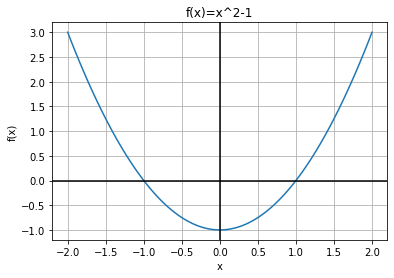

In [ ]:
x = np.linspace(-2.0,2.0,100)
fig, ax = plt.subplots()
ax.plot(x,f(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('f(x)=x^2-1')
plt.xlabel('x')
plt.ylabel('f(x)')




zoom out
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


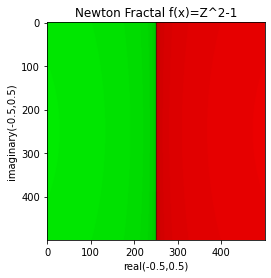

Z region from ( -1.0 , -1.0 ) to ( 1.0 , 1.0 )


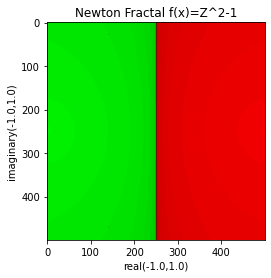

Z region from ( -1.5 , -1.5 ) to ( 1.5 , 1.5 )


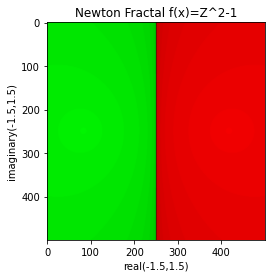

Z region from ( -2.0 , -2.0 ) to ( 2.0 , 2.0 )


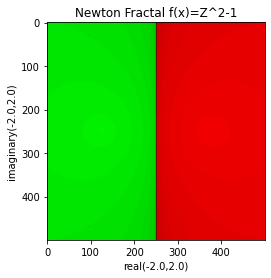

Z region from ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


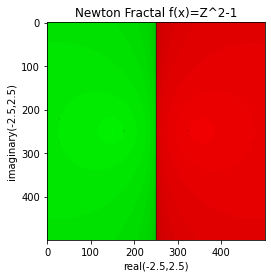

In [ ]:
print("zoom out")
display4(zoom=1)
display4(zoom=2)
display4(zoom=3)
display4(zoom=4)
display4(zoom=5)

zoom in
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


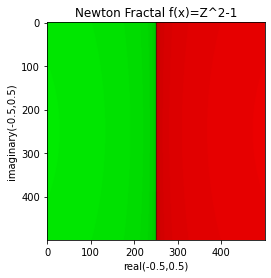

Z region from ( -0.25 , -0.25 ) to ( 0.25 , 0.25 )


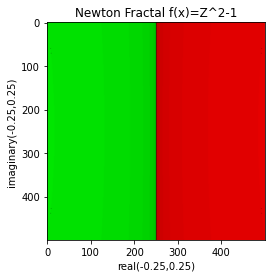

Z region from ( -0.16666666666666666 , -0.16666666666666666 ) to ( 0.16666666666666666 , 0.16666666666666666 )


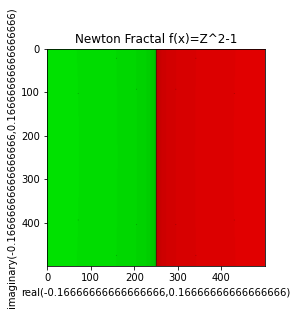

Z region from ( -0.125 , -0.125 ) to ( 0.125 , 0.125 )


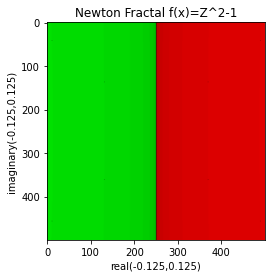

Z region from ( -0.1 , -0.1 ) to ( 0.1 , 0.1 )


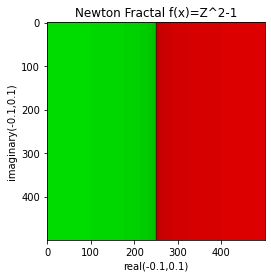

Z region from ( -0.05 , -0.05 ) to ( 0.05 , 0.05 )


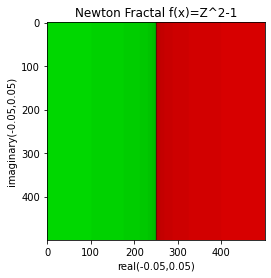

Z region from ( -0.005 , -0.005 ) to ( 0.005 , 0.005 )


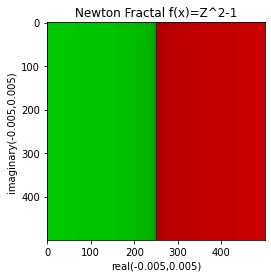

Z region from ( -0.0005 , -0.0005 ) to ( 0.0005 , 0.0005 )


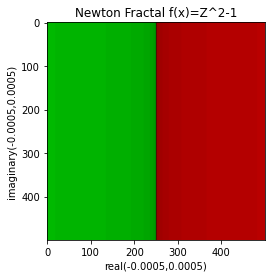

In [ ]:
print("zoom in")
display4(zoom=1)
display4(zoom=1/2)
display4(zoom=1/3)
display4(zoom=1/4)
display4(zoom=1/5)
display4(zoom=1/10)
display4(zoom=1/100)
display4(zoom=1/1000)

### Newton iterates form z=10.0 + 0.0j

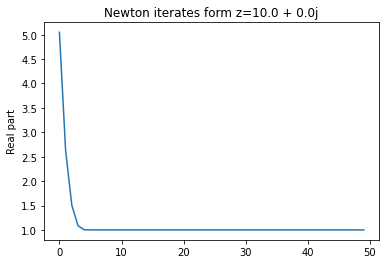

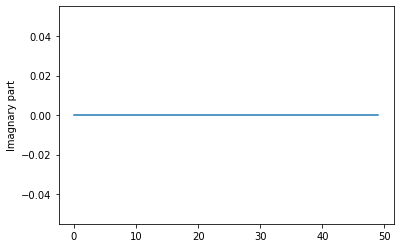

In [ ]:
z=10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

### Newton iterates form z=-10.0 + 0.0j

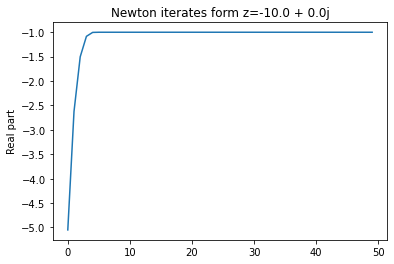

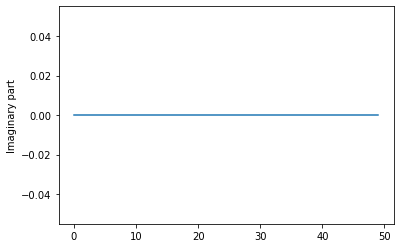

In [ ]:
z=-10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

### Newton iterates form z=0.0 + 10.0j

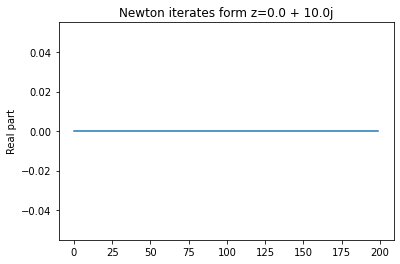

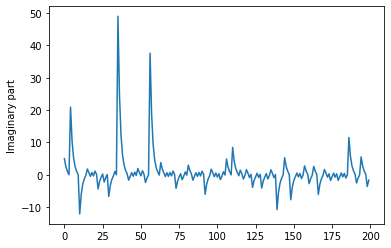

In [ ]:
z=-0.0 + 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

### Newton iterates form z=0.0 - 10.0j

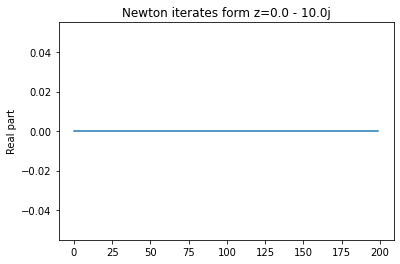

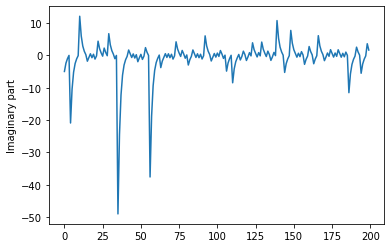

In [ ]:
z=-0.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

### Newton iterates form z=0.0 + 0.0j

In [ ]:
z=-0.0 + 0.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

ZeroDivisionError: ignored

##Modify the Python code including code that implements the Classic and Po Shen Loh ‘s methods for solving quadratic equations and:

## 1) Plot the following functions in a x range that include that include the vertex and the roots (if there are roots)




In [ ]:
def plotFunction(titlePlot, function, x):
  fig, ax = plt.subplots()
  ax.plot(x,function)
  ax.axhline(y=0, color='k')
  ax.axvline(x=0, color='k')
  ax.grid(True, which='both')
  plt.title(titlePlot)
  plt.xlabel('x')
  plt.ylabel('f(x)')


###- $x^2$

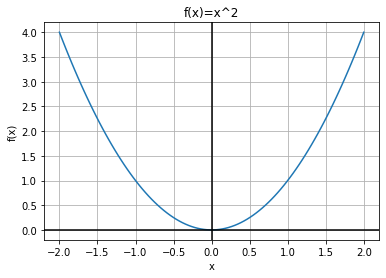

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np

def f(z):
    return z ** 2

def df(z):
    return 2 * z
x = np.linspace(-2.0,2.0,100)
plotFunction('f(x)=x^2', f(x), x)


###- $(x-1)^2$

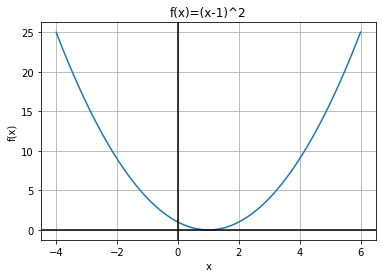

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np

def f(z):
    return (z-1) ** 2

def df(z):
    return 2 * (z-1)

x = np.linspace(-4.0,6.0,100)
plotFunction('f(x)=(x-1)^2', f(x), x)


###- $x^2 – 1$

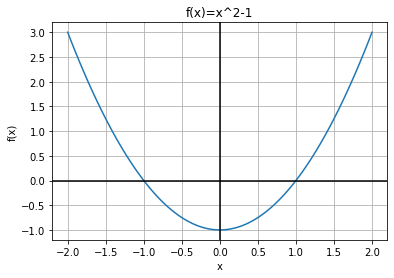

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np

def f(z):
    return z**2-1

def df(z):
    return 2*z

x = np.linspace(-2.0,2.0,100)
plotFunction('f(x)=x^2-1', f(x), x)


###- $x^2+ 1$

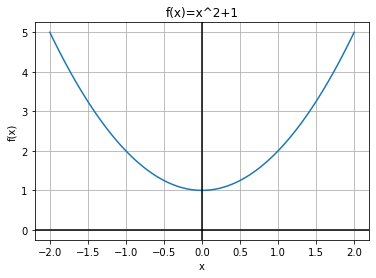

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np

def f(z):
    return z**2+1

def df(z):
    return 2*z

x = np.linspace(-2.0,2.0,100)
plotFunction('f(x)=x^2+1', f(x), x)


## 2) Apply the Classic and Po Shen Loh ‘s methods for solving the following quadratic equations


### Classic method

In [ ]:
import math 

def quadraticSolutionClassic(a,b,c):
  discriminant = b**2 - 4 * a * c
  if (discriminant >= 0):
      if (discriminant == 0):
          x = -b / (2 * a)
          print("The only root using Classic method is {:.3f}".format(x))
      else:
          x1 = (-b + math.sqrt(discriminant)) / (2 * a)
          x2 = (-b - math.sqrt(discriminant)) / (2 * a)
          print("The real root x1 using Classic method  is {:.3f}".format(x1))
          print("The real root x2 using Classic method  is {:.3f}".format(x2))
  else:
    discriminant = abs(discriminant)
    realPart = -b / (2 * a)
    imaginaryPart = math.sqrt(discriminant) / (2 * a)
    print("The complex root x1 using Classic method  is {:.3f} + {:.3f}i".format(realPart, imaginaryPart))
    print("The complex root x2 using Classic method  is {:.3f} - {:.3f}i".format(realPart, imaginaryPart))  

### Po Shen Loh method

In [ ]:
from sympy import *
import math 

u = Symbol('u')

def poshenloh(a,b,c):
    b1 = b/a
    c1 = c/a
    a1 = a/a
    firstPart = -b1/2 - u
    secondPart = -b1/2 + u
    C = expand(firstPart * secondPart)
    D = -1*C
    solveU = D+c1
    arraySol = solve(solveU,u)
    if len(arraySol) == 1:
      x1 = -b1/2 + arraySol[0]
      return print("The only root using Po Shen Loh method is {}".format(x1))
    else:
      x1 = -b1/2 + arraySol[1]
      x2 = -b1/2 + arraySol[0]
      return print("The first root using Po Shen Loh method is {} \nThe second root using Po Shen Loh method is {}".format(x1,x2))

###- $x^2 = 0$

In [ ]:
quadraticSolutionClassic(1,0,0)
poshenloh(1,0,0)


The only root using Classic method is 0.000
The only root using Po Shen Loh method is 0


###- $(x-1)^2 = 0$

  We can see the function $(x-1)^2$ as $x^2-2x+1$, so...

In [ ]:
quadraticSolutionClassic(1,-2,1)
poshenloh(1,-2,1)

The only root using Classic method is 1.000
The only root using Po Shen Loh method is 1.00000000000000


###- $x^2 – 1 = 0$

In [ ]:
quadraticSolutionClassic(1,0,-1)
poshenloh(1,0,-1)

The real root x1 using Classic method  is 1.000
The real root x2 using Classic method  is -1.000
The first root using Po Shen Loh method is 1.00000000000000 
The second root using Po Shen Loh method is -1.00000000000000


###- $x^2+ 1 = 0$

In [ ]:
quadraticSolutionClassic(1,0,1)
poshenloh(1,0,1)

The complex root x1 using Classic method  is 0.000 + 1.000i
The complex root x2 using Classic method  is 0.000 - 1.000i
The first root using Po Shen Loh method is 1.0*I 
The second root using Po Shen Loh method is -1.0*I


##3) To plot the newton fractals for the corresponding complex quadratic polynomials


###- $z^2$

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np

def f(z):
    return z ** 2

def df(z):
    return 2 * z

def newton_set1(z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256):
    """ Fractals using newton-raphson """

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    h = 1e-7 # step size for numerical derivative
    eps = 1e-3 # max error allowed

    # Bounding roots
    r1 = 0

    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 5

    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                
                for i in range(niter):
                    # complex numerical derivative
                    dz = df(z)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    znext = z - f(z) / dz # Newton iteration

                    if abs(znext - z) < eps: # stop when close enough to any root
                        break
                    
                    z = znext

                # Pixels colored using the roots
                if abs(z-r1)<eps:
                    # color red
                    pixels[height-y-1,x] = (255 - count*multcol, 0, 0)
                else:   
                   pixels[height-y-1,x] = (0, 0, 0)
               
    return pixels

def display1(z_c_r=0, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=1,  niter=256):
    """ Display a newton-raphson fractal """
    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set1(z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter)
    plt.title('Newton Fractal f(x)=Z^2')
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()


zoom in
Z region from ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


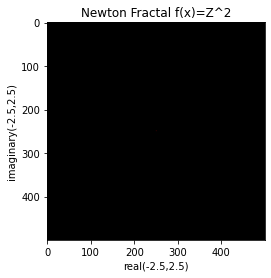

Z region from ( -2.0 , -2.0 ) to ( 2.0 , 2.0 )


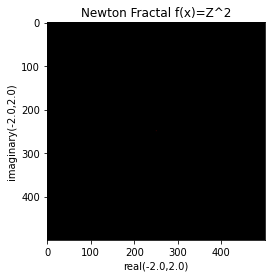

Z region from ( -1.5 , -1.5 ) to ( 1.5 , 1.5 )


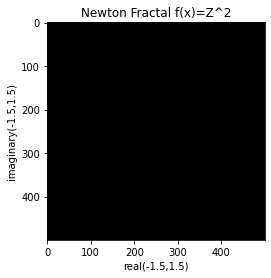

Z region from ( -1.0 , -1.0 ) to ( 1.0 , 1.0 )


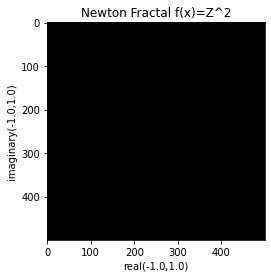

Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


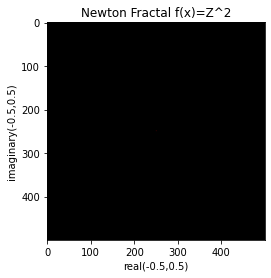

Z region from ( -0.25 , -0.25 ) to ( 0.25 , 0.25 )


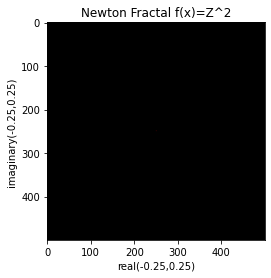

Z region from ( -0.16666666666666666 , -0.16666666666666666 ) to ( 0.16666666666666666 , 0.16666666666666666 )


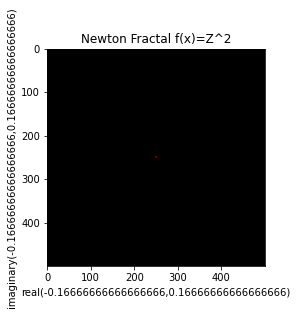

Z region from ( -0.125 , -0.125 ) to ( 0.125 , 0.125 )


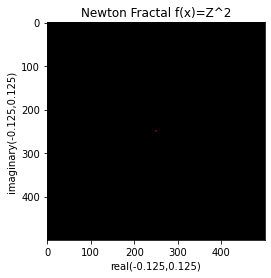

Z region from ( -0.1 , -0.1 ) to ( 0.1 , 0.1 )


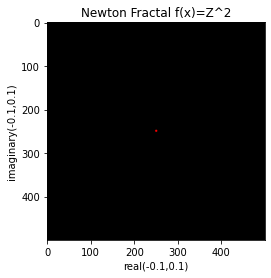

Z region from ( -0.05 , -0.05 ) to ( 0.05 , 0.05 )


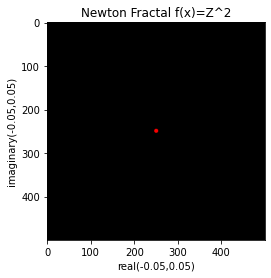

Z region from ( -0.005 , -0.005 ) to ( 0.005 , 0.005 )


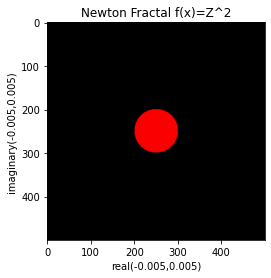

Z region from ( -0.001 , -0.001 ) to ( 0.001 , 0.001 )


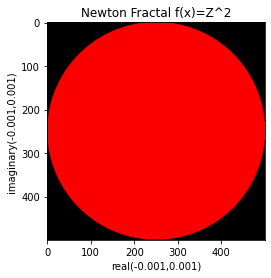

Z region from ( -0.0005 , -0.0005 ) to ( 0.0005 , 0.0005 )


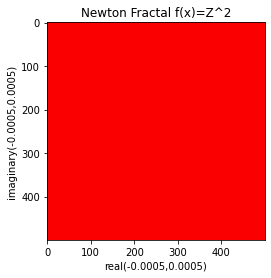

In [ ]:
print("zoom in")
display1(zoom=5)
display1(zoom=4)
display1(zoom=3)
display1(zoom=2)
display1(zoom=1)
display1(zoom=1/2)
display1(zoom=1/3)
display1(zoom=1/4)
display1(zoom=1/5)
display1(zoom=1/10)
display1(z_c_r = 0,zoom=1/100)
display1(z_c_r = 0,zoom=1/500)
display1(zoom=1/1000)

###- $(z-1)^2$


In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np

def f(z):
    return z**2 - 2*z + 1

def df(z):
    return 2 * z - 2 

def newton_set2(z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256):
    """ Fractals using newton-raphson """

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    h = 1e-7 # step size for numerical derivative
    eps = 1 # max error allowed

    # Bounding roots
    r1 = 1

    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 5

    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                
                for i in range(niter):
                    # complex numerical derivative
                    dz = df(z)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    znext = z - f(z) / dz # Newton iteration

                    if abs(znext - z) < eps: # stop when close enough to any root
                        break
                    
                    z = znext

                # Pixels colored using the roots
                if abs(z-r1)<eps:
                    # color red
                    pixels[height-y-1,x] = (255 - count*multcol, 0, 0)
                else:   
                   pixels[height-y-1,x] = (0, 0, 0)
               
    return pixels

def display2(z_c_r=0, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=1,  niter=256):
    """ Display a newton-raphson fractal """
    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set2(z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter)
    plt.title('Newton Fractal f(x)=(Z-1)^2')
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()


zoom in
Z region from ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


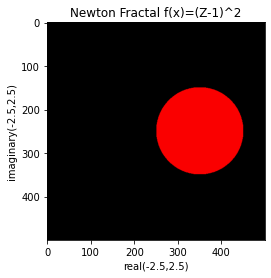

Z region from ( -2.0 , -2.0 ) to ( 2.0 , 2.0 )


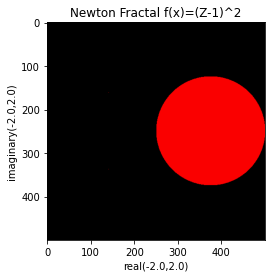

Z region from ( -1.5 , -1.5 ) to ( 1.5 , 1.5 )


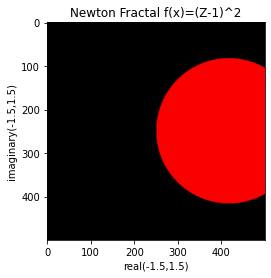

Z region from ( -1.0 , -1.0 ) to ( 1.0 , 1.0 )


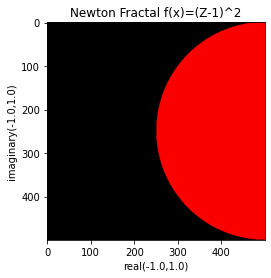

Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


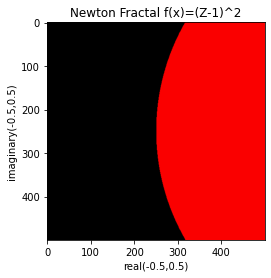

Z region from ( -0.25 , -0.25 ) to ( 0.25 , 0.25 )


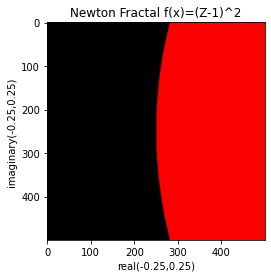

Z region from ( 0.8333333333333334 , -0.16666666666666666 ) to ( 1.1666666666666667 , 0.16666666666666666 )


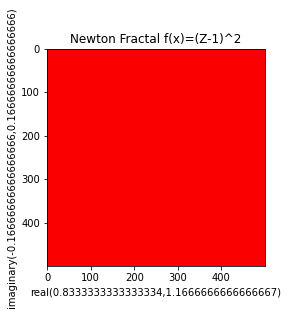

Z region from ( 0.875 , -0.125 ) to ( 1.125 , 0.125 )


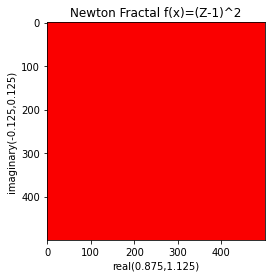

Z region from ( 0.9 , -0.1 ) to ( 1.1 , 0.1 )


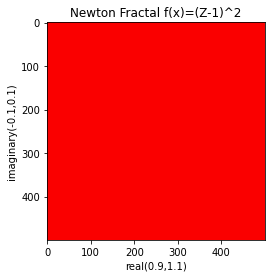

Z region from ( 0.95 , -0.05 ) to ( 1.05 , 0.05 )


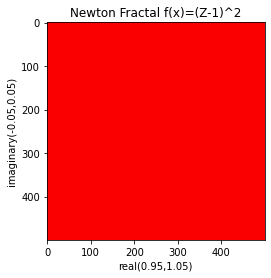

Z region from ( 0.995 , -0.005 ) to ( 1.005 , 0.005 )


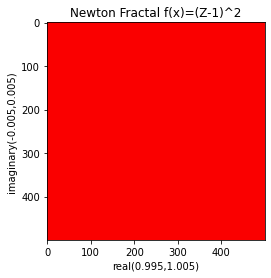

Z region from ( 0.999 , -0.001 ) to ( 1.001 , 0.001 )


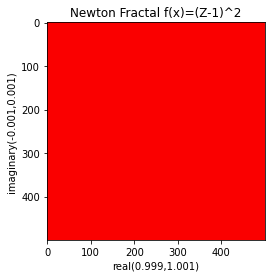

Z region from ( -0.0005 , -0.0005 ) to ( 0.0005 , 0.0005 )


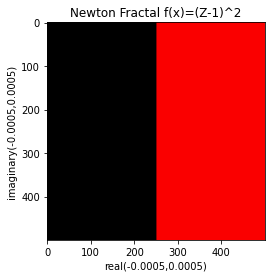

In [ ]:
print("zoom in")
display2(zoom=5)
display2(zoom=4)
display2(zoom=3)
display2(zoom=2)
display2(zoom=1)
display2(zoom=1/2)
display2(z_c_r = 1,zoom=1/3)
display2(z_c_r = 1,zoom=1/4)
display2(z_c_r = 1,zoom=1/5)
display2(z_c_r = 1,zoom=1/10)
display2(z_c_r = 1,zoom=1/100)
display2(z_c_r = 1,zoom=1/500)
display2(zoom=1/1000)

###- $z^2+1$

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np

def f(z):
    return z ** 2 +1

def df(z):
    return 2 * z

def newton_set3(z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256):
    """ Fractals using newton-raphson """

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    h = 1e-7 # step size for numerical derivative
    eps = 1e-3 # max error allowed

    # Bounding roots
    r1 = complex(0,1)
    r2 = complex(0,-1)

    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 5

    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                
                for i in range(niter):
                    # complex numerical derivative
                    dz = df(z)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    znext = z - f(z) / dz # Newton iteration

                    if abs(znext - z) < eps: # stop when close enough to any root
                        break
                    
                    z = znext

                # Pixels colored using the roots
                if abs(z-r1)<eps:
                    # color red
                    pixels[height-y-1,x] = (255 - count*multcol, 0, 0)
                elif abs(z-r2)<=eps:
                    # color green
                    pixels[height-y-1,x] = (0, 255 - count*multcol, 0)
                else:   
                   pixels[height-y-1,x] = (0, 0, 0)
               
    return pixels

def display3(z_c_r=0, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=1,  niter=256):
    """ Display a newton-raphson fractal """
    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set3(z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter)
    plt.title('Newton Fractal f(x)=Z^2+1')
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()


zoom out
Z region from ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


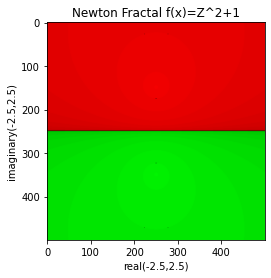

Z region from ( -2.0 , -2.0 ) to ( 2.0 , 2.0 )


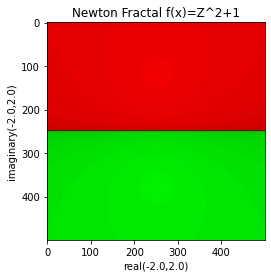

Z region from ( -1.5 , -1.5 ) to ( 1.5 , 1.5 )


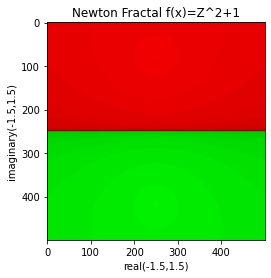

Z region from ( -1.0 , -1.0 ) to ( 1.0 , 1.0 )


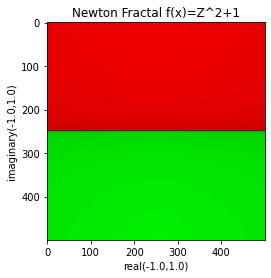

Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


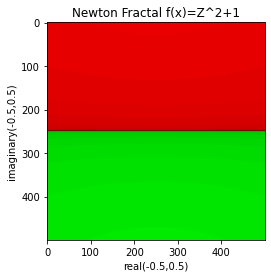

Z region from ( -0.25 , -0.25 ) to ( 0.25 , 0.25 )


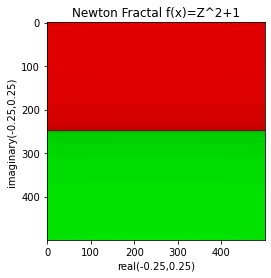

Z region from ( -0.16666666666666666 , -0.16666666666666666 ) to ( 0.16666666666666666 , 0.16666666666666666 )


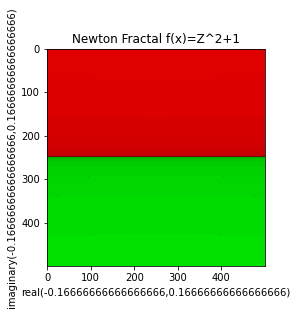

Z region from ( -0.125 , -0.125 ) to ( 0.125 , 0.125 )


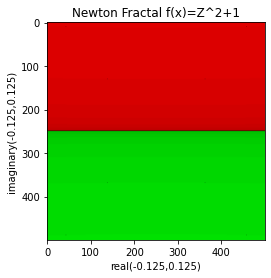

Z region from ( -0.1 , -0.1 ) to ( 0.1 , 0.1 )


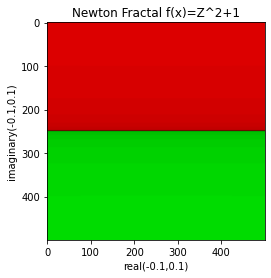

Z region from ( -0.05 , -0.05 ) to ( 0.05 , 0.05 )


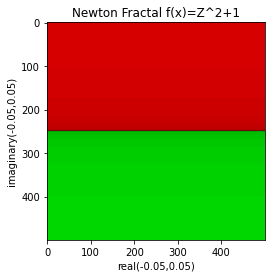

Z region from ( -0.005 , -0.005 ) to ( 0.005 , 0.005 )


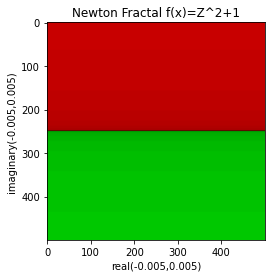

Z region from ( -0.0005 , -0.0005 ) to ( 0.0005 , 0.0005 )


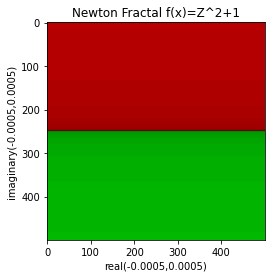

In [ ]:
print("zoom out")
display3(zoom=5)
display3(zoom=4)
display3(zoom=3)
display3(zoom=2)
display3(zoom=1)
display3(zoom=1/2)
display3(zoom=1/3)
display3(zoom=1/4)
display3(zoom=1/5)
display3(zoom=1/10)
display3(zoom=1/100)
display3(zoom=1/1000)

##4)Plot the Newton iterates for points on the positive and negative axes for the complex quadratic polynomials in 3. Give an interpretation of the results.

###$z^2$

#### Newton iterates form z=10.0 + 0.0j

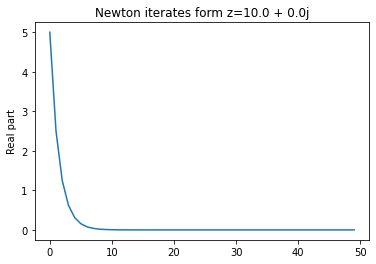

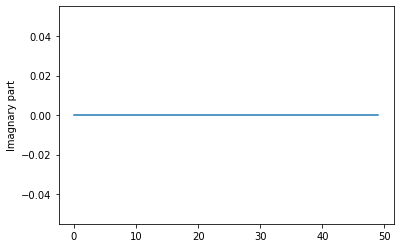

In [ ]:
def f(z):
    return z ** 2

def df(z):
    return 2 * z

z=10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

#### Newton iterates form z=-10.0 + 0.0j

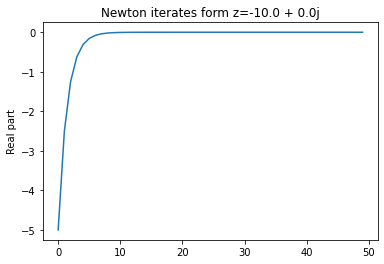

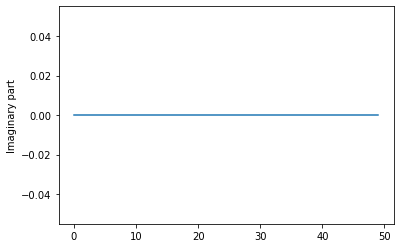

In [ ]:
def f(z):
    return z ** 2

def df(z):
    return 2 * z

z=-10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

#### Newton iterates form z=0.0 + 10.0j

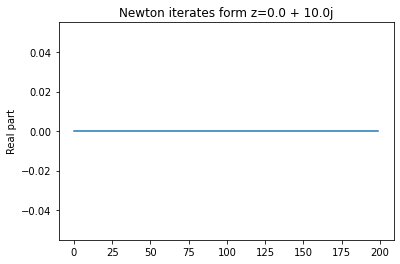

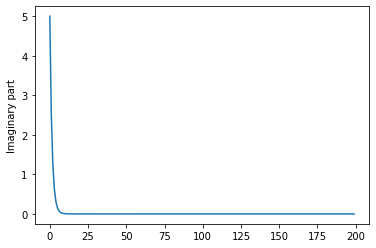

In [ ]:
def f(z):
    return z ** 2

def df(z):
    return 2 * z

z=-0.0 + 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

#### Newton iterates form z=0.0 - 10.0j

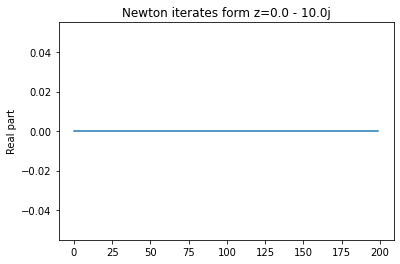

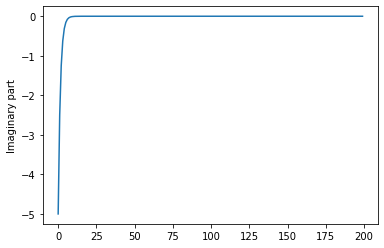

In [ ]:
def f(z):
    return z ** 2

def df(z):
    return 2 * z

z=-0.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

De acuerdo a las 5 iteraciones creadas a partir de los ejes de la función, se puede concluir que:
1. En la iteracion #1 se puede observar un decrecimiento de la función en parte real de $z^2$ que tiende a 0. \
Esto tiene sentido, ya que la única raiz tiene como punto la posición 0. Por otro lado, se puede observar que en la parte imaginaria se mantiene una línea recta que está situada sobre "0". Esto se debe a que la función no posee raices imaginarias.
2. Lo mismo ocurre en la iteracion #2, como el eje en el cual comienza la convergencia es el eje real, este tiende a ir hacia 0, como ocurre en la gráfica #1.
3. Frente a las iteracion #3 y #4, observamos una convergencia hacia el eje 0, lo cuál confirma la solución dada usando los métodos del punto 2.
4. Con respecto a la iteración #5, se puede evidenciar un error en la función y se debe a que la función diverge.

#### Newton iterates form z=0.0 + 0.0j

In [ ]:
def f(z):
    return z ** 2

def df(z):
    return 2 * z

z=-0.0 + 0.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

ZeroDivisionError: ignored

### $(z-1)^2$

#### Newton iterates form z=10.0 + 0.0j

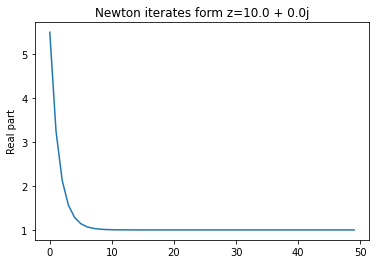

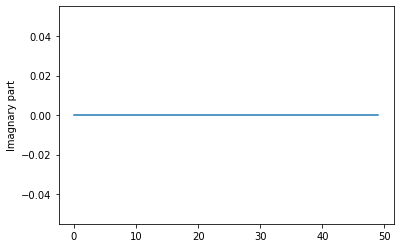

In [ ]:
def f(z):
    return z**2 - 2*z + 1

def df(z):
    return 2 * z -2

z=10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

#### Newton iterates form z=-10.0 + 0.0j

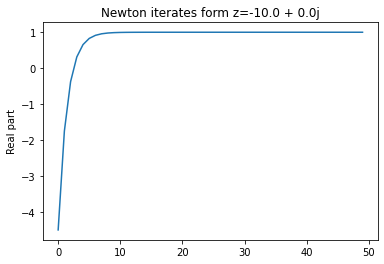

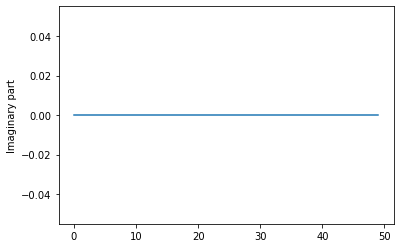

In [ ]:
def f(z):
    return z**2 - 2*z + 1

def df(z):
    return 2 * z -2

z=-10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

#### Newton iterates form z=0.0 + 10.0j

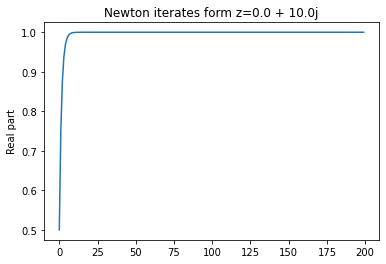

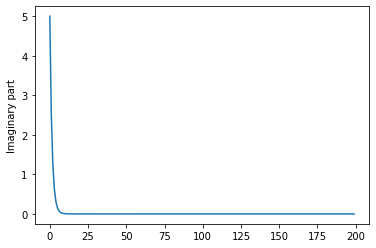

In [ ]:
def f(z):
    return z**2 - 2*z + 1

def df(z):
    return 2 * z -2

z=-0.0 + 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

#### Newton iterates form z=0.0 - 10.0j

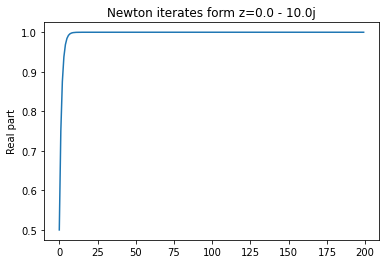

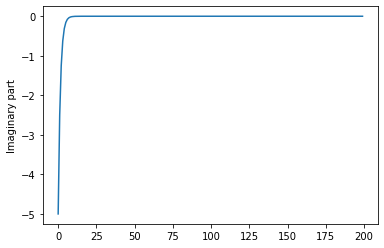

In [ ]:
def f(z):
    return z**2 - 2*z + 1

def df(z):
    return 2*z-2

z=-0.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

#### Newton iterates form z=0.0 + 0.0j

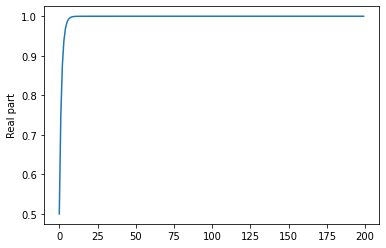

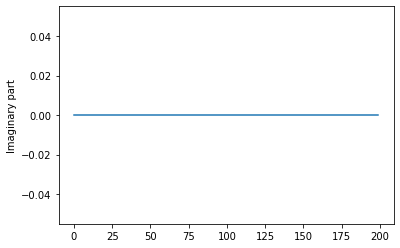

In [ ]:
def f(z):
    return z**2 - 2*z + 1

def df(z):
    return 2 * z -2

z=-0.0 + 0.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

Con respecto a las gráficas #1, #2, #3, #4 y #5 las cuales toman los puntos desde los ejes, se puede concluir que todas convergen al punto 1, teniendo lógica ya que la única raíz que posee esta función es 1. Hablando de la parte imaginaria, converge a 0 ya que no existen raices imaginarias en esta función.

###$z^2-1$ 

#### Newton iterates form z=10.0 + 0.0j

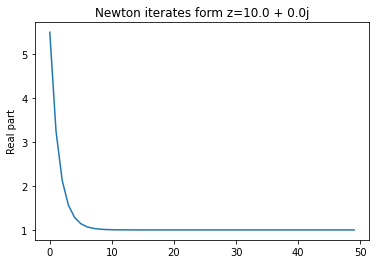

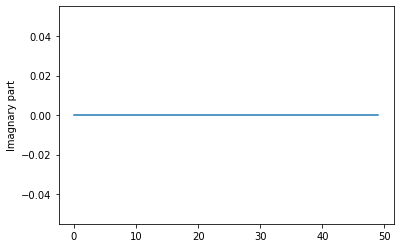

In [ ]:
z=10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

#### Newton iterates form z=-10.0 + 0.0j

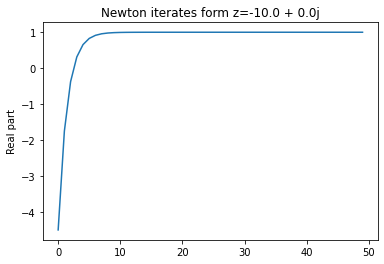

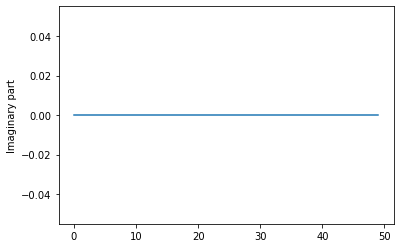

In [ ]:
z=-10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

#### Newton iterates form z=0.0 + 10.0j

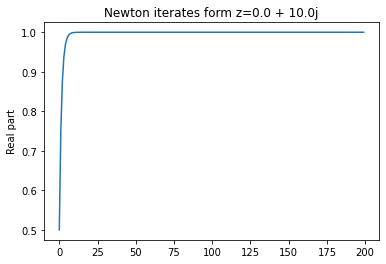

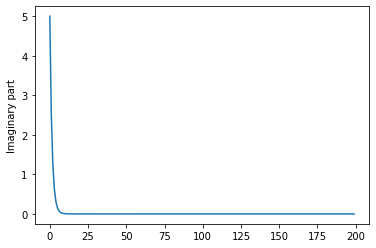

In [ ]:
z=-0.0 + 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

#### Newton iterates form z=0.0 - 10.0j

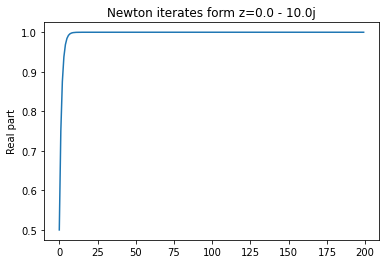

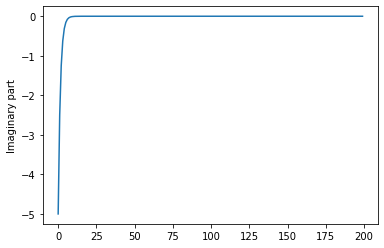

In [ ]:
z=-0.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

#### Newton iterates form z=0.0 + 0.0j

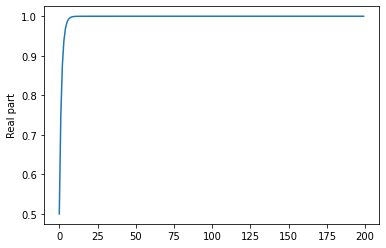

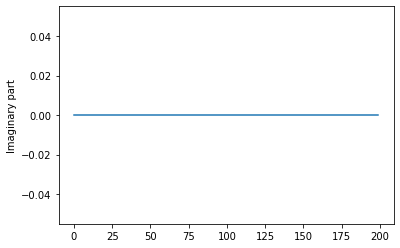

In [ ]:
z=-0.0 + 0.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

1. En la iteración 1 se puede observar que usando el método de Newton, se encuentra la primera raíz que tiende hacia 1; Esto sucede porque la posición del punto está ubicada en los ejes reales positivos.
2. En la iteración 2 se puede observar que usando el método de Newton, se encuentra la primera raíz que tiende hacia -1; Esto sucede porque la posición del punto está ubicada en los ejes reales negativos.
3. En las dos siguientes iteraciones, se puede observar que, cuando nos situamos en los ejes imaginarios, no tiende a ir a alguna raíz, esto sucede porque no existen raices imaginarias.

### $z^2 +1$

#### Newton iterates form z=10.0 + 0.0j

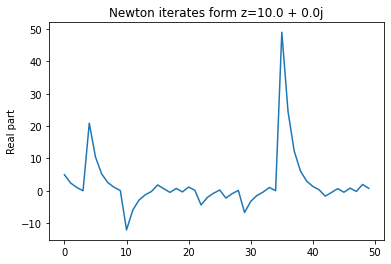

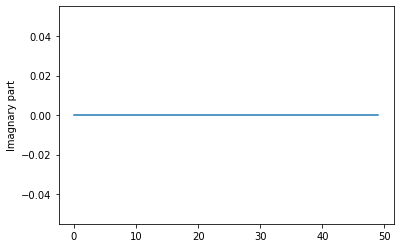

In [ ]:
def f(z):
    return z**2 + 1

def df(z):
    return 2 * z

z=10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

#### Newton iterates form z=-10.0 + 0.0j

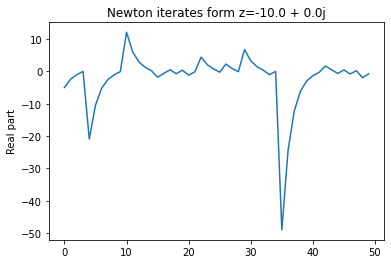

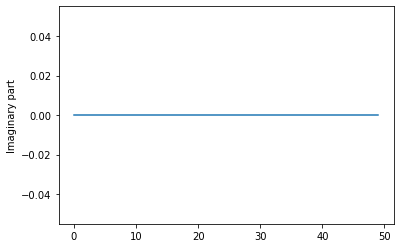

In [ ]:
def f(z):
    return z**2 + 1

def df(z):
    return 2 * z

z=-10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

#### Newton iterates form z=0.0 + 10.0j

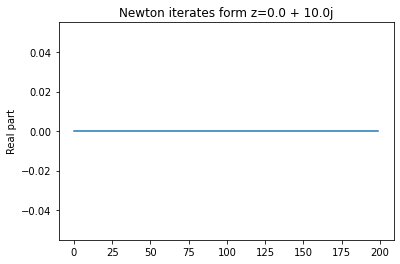

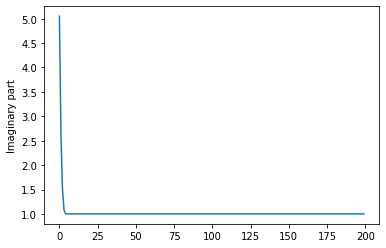

In [ ]:
def f(z):
    return z**2 + 1

def df(z):
    return 2 * z

z=-0.0 + 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

#### Newton iterates form z=0.0 - 10.0j

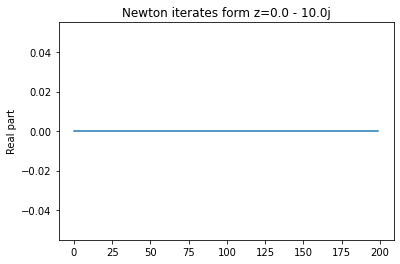

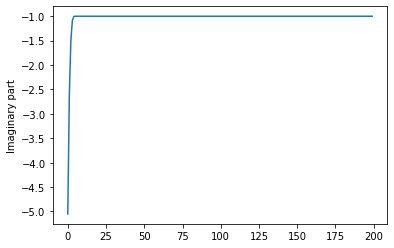

In [ ]:
def f(z):
    return z**2 + 1

def df(z):
    return 2*z

z=-0.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

#### Newton iterates form z=0.0 + 0.0j

In [ ]:
def f(z):
    return z**2 + 1

def df(z):
    return 2 * z

z=-0.0 + 0.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

ZeroDivisionError: ignored

Frente a las 2 primeras iteraciones (siendo estas las que parten el punto desde el eje real) se puede observar que la raíz al cual diverge la parte real no es claro; y se manifiesta con varios picos durante las 50 repeticiones.
Esto se debe a que el método de Newton no encuentra la raíz y nunca lo hará, ya que esta función no posee raices en los números reales.
Caso contrario a las 2 siguientes iteraciones. Se puede observar qué, cuando nos situamos en los ejes imaginarios, estas raices tienen a ir hacia -i e i, como se demuestra en el punto 2 del taller (uso de los métodos clásico y po shen loh para hallar raices).

## 5) Plot he Newton iterates for points on the diagonals in the four quadrants and 0.0 + 0.0j for the complex quadratic polynomials in 3. Give an interpretation of the results.

###$z^2$

#### Newton iterates form z=10.0 + 10.0j

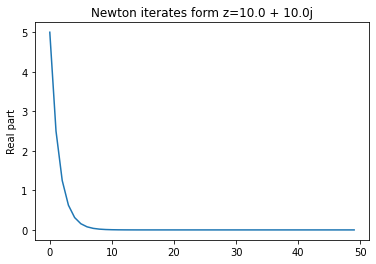

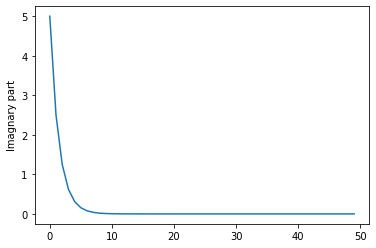

In [ ]:
def f(z):
    return z ** 2

def df(z):
    return 2 * z

z=10.0 + 10.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

#### Newton iterates form z=-10.0 + 10.0j

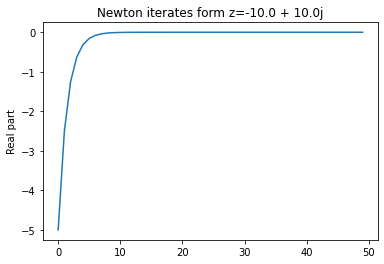

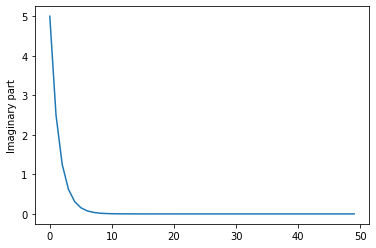

In [ ]:
def f(z):
    return z ** 2

def df(z):
    return 2 * z

z=-10.0 + 10.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

#### Newton iterates form z=-10.0 - 10.0j

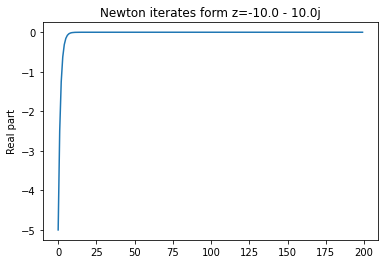

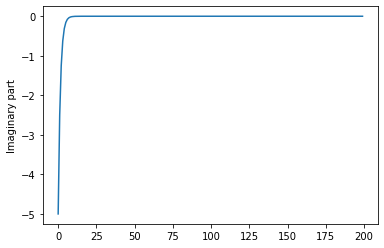

In [ ]:
def f(z):
    return z ** 2

def df(z):
    return 2 * z

z=-10.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

#### Newton iterates form z=10.0 - 10.0j

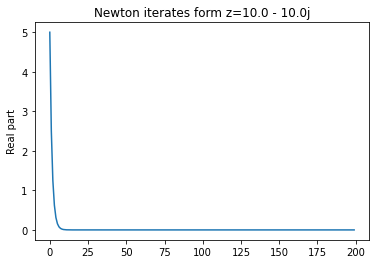

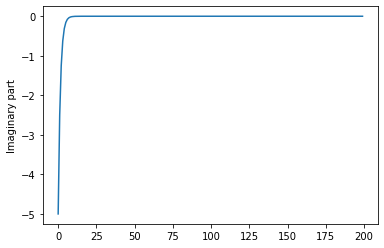

In [ ]:
def f(z):
    return z ** 2

def df(z):
    return 2 * z

z=10.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

Frente a las 4 iteraciones ubicadas en las diagonales de los ejes, se puede observar que todas las funciones tienden a ir a 0. 
Lo cual tiene sentido porque la raíz de esta función es 0.

### $(z-1)^2$

#### Newton iterates form z=10.0 + 10.0j

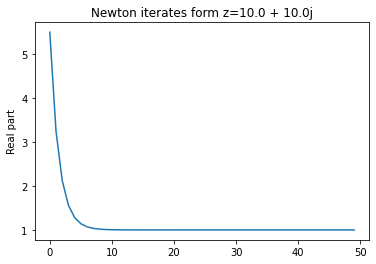

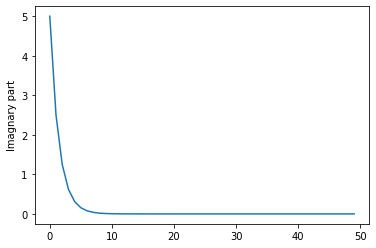

In [ ]:
def f(z):
    return z**2 - 2*z + 1

def df(z):
    return 2 * z -2

z=10.0 + 10.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

#### Newton iterates form z=-10.0 + 10.0j

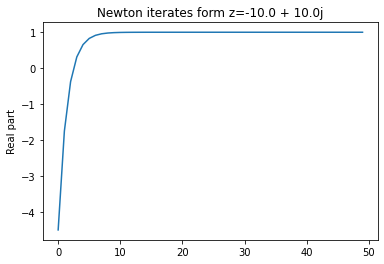

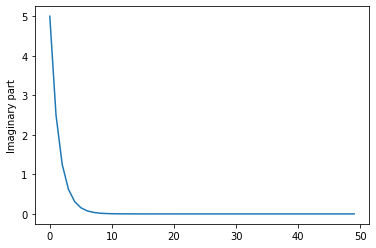

In [ ]:
def f(z):
    return z**2 - 2*z + 1

def df(z):
    return 2 * z -2

z=-10.0 + 10.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

#### Newton iterates form z=-10.0 - 10.0j

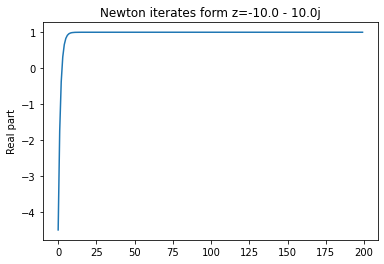

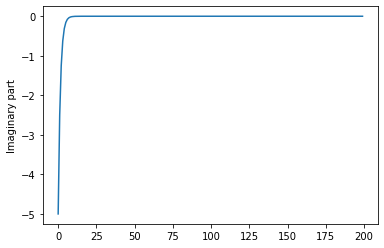

In [ ]:
def f(z):
    return z**2 - 2*z + 1

def df(z):
    return 2 * z -2

z=-10.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

#### Newton iterates form z=10.0 - 10.0j

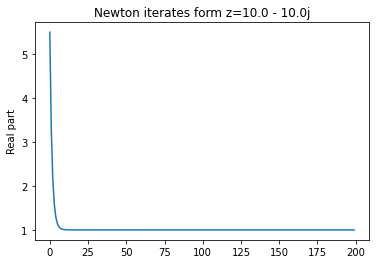

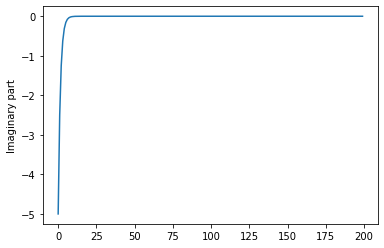

In [ ]:
def f(z):
    return z**2 - 2*z + 1

def df(z):
    return 2 * z -2

z=10.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

Frente a las 4 iteraciones ubicadas en las diagonales de los ejes, se puede observar que todas las funciones tienden a ir a 1. 
Lo cual tiene sentido porque la raíz de esta función es 1, según los resultados del punto dos de este taller..

### $z^2 +1$

#### Newton iterates form z=10.0 + 10.0j

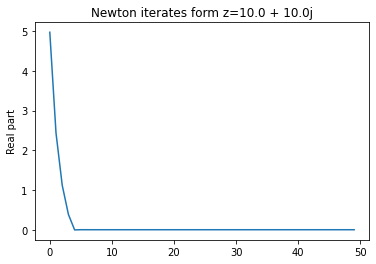

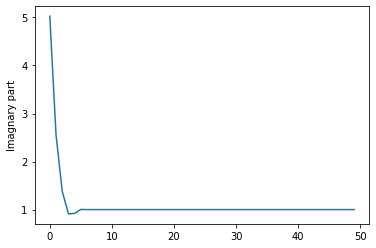

In [ ]:
def f(z):
    return z**2 + 1

def df(z):
    return 2 * z

z=10.0 + 10.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

#### Newton iterates form z=-10.0 + 10.0j

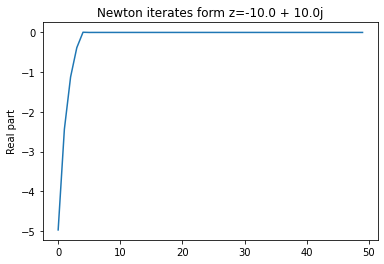

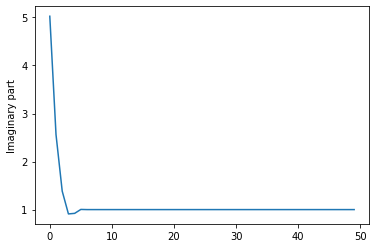

In [ ]:
def f(z):
    return z ** 2 +1

def df(z):
    return 2 * z

z=-10.0 + 10.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

#### Newton iterates form z=-10.0 - 10.0j

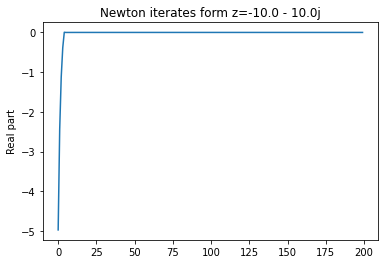

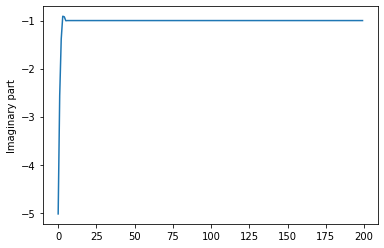

In [ ]:
def f(z):
    return z ** 2 +1

def df(z):
    return 2 * z

z=-10.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

#### Newton iterates form z=10.0 - 10.0j

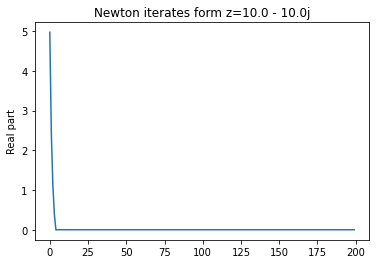

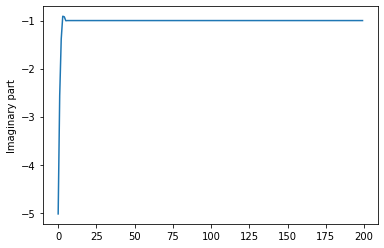

In [ ]:
def f(z):
    return z ** 2 +1

def df(z):
    return 2 * z

z=10.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

Frente a las dos primeras iteraciones, las cuales están ubicadas en las diagonales positivas imaginarias, se puede observar que, usando el metodo de Newton, está función tiende a ir a 1i. Siendo esta la raíz positiva imaginaria de esta función.
Frente a las dos ultimas iteraciones, las cuales están ubicadas en las diagonales negativas imaginarias, se puede observar que, usando el metodo de Newton, está función tiende a ir a -1i. Siendo esta la raíz negativa imaginaria de esta función.


###$z^2-1$

#### Newton iterates form z=10.0 + 10.0j

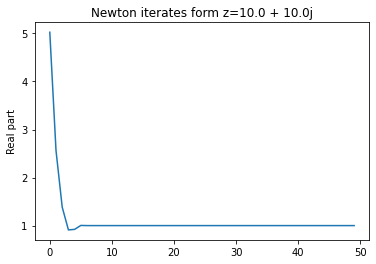

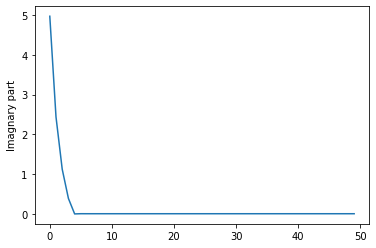

In [ ]:
def f(z):
    return z**2 - 1

def df(z):
    return 2 * z

z=10.0 + 10.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

#### Newton iterates form z=10.0 - 10.0j

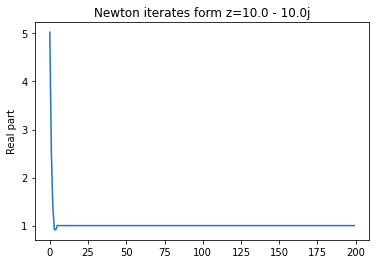

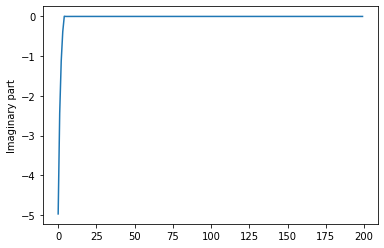

In [ ]:
def f(z):
    return z ** 2 -1

def df(z):
    return 2 * z

z=10.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

#### Newton iterates form z=-10.0 + 10.0j

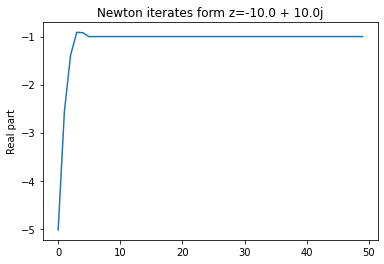

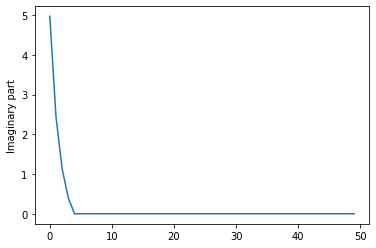

In [ ]:
def f(z):
    return z ** 2 -1

def df(z):
    return 2 * z

z=-10.0 + 10.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

#### Newton iterates form z=-10.0 - 10.0j

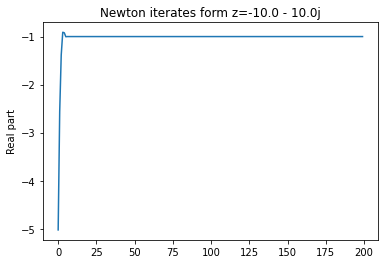

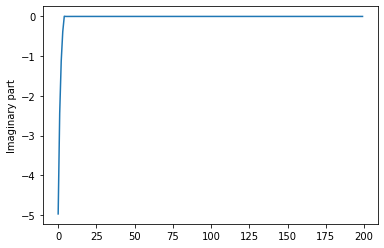

In [ ]:
def f(z):
    return z ** 2 -1

def df(z):
    return 2 * z

z=-10.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

En las dos primeras iteraciones (las cuales se parte desde el área positiva real), se puede observar que las funciones tienden a ir hacía 1, qué de acuerdo a los métodos usados en el inciso 2, es correcto.
En las dos últimas iteraciones (que hacen parte a la ubicación de un punto en el eje negativo real), se puede observar que las funciones tienden a ir hacía -1,qué de acuerdo a los métodos usados en el inciso 2, es correcto.
En las 4 iteraciones se puede observar que las raices imaginarias tienden a ir a 0, lo cuál coincide ya que esta función no posee raices imaginarias.